In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Diabetes_Preprocessing.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,11.0,76.0,48.0,18.0,32.9,0.171,63,0
764,2,122.0,7.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,3,0
766,1,126.0,6.0,NaN,NaN,3.1,0.349,47,1


In [3]:
# The issue with this data set is that we have a lot of null values
diabetes_df.isnull().sum(), diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


(Pregnancies                   0
 Glucose                       5
 BloodPressure                35
 SkinThickness               227
 Insulin                     374
 BMI                          11
 DiabetesPedigreeFunction      0
 Age                           0
 Outcome                       0
 dtype: int64, None)

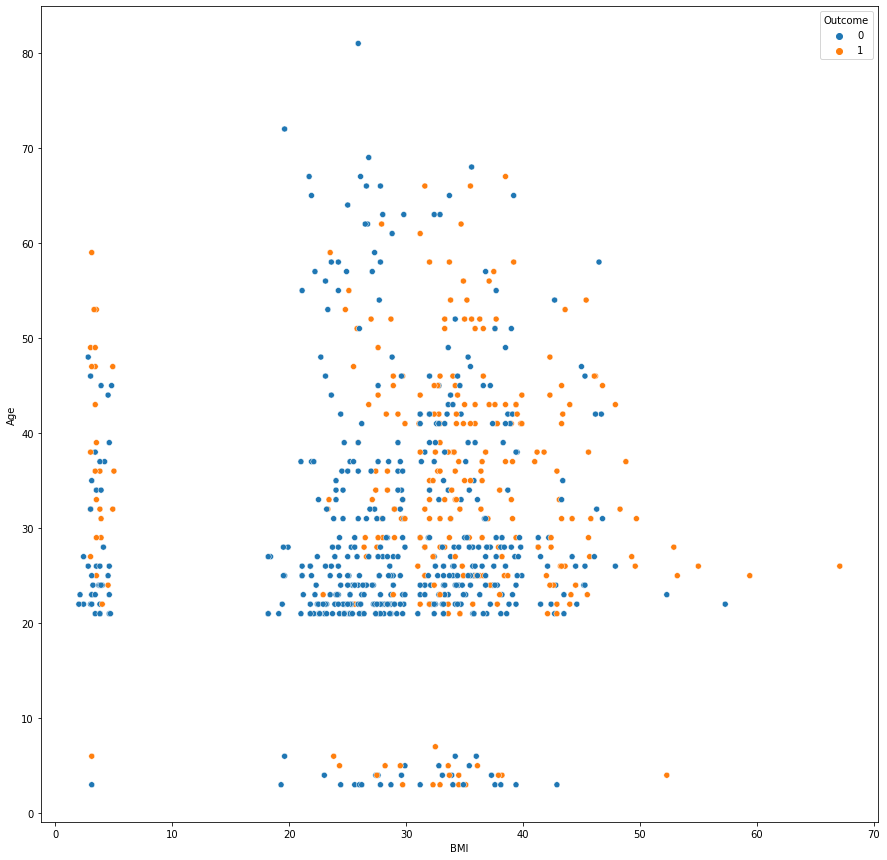

In [4]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'BMI',y = 'Age', data  = diabetes_df, hue = 'Outcome')
plt.show()

**Dealing with missing values**

We have a lot of missing values in this data set, particularly for the insulin entry. One option would be to drop all missing values but this would cause a huge drop in data. Instead, we will try to fill in the missing values.

The ption we will try first will be to replace all missing values with the mean. This works because all of the missing values fall into continuous, or essentially continuous, data types.

Another option, which may improve the accuracy of our NN would be to do a type of k nearest neighboors approach where one instead inputs the mean of say the 10 nearest neighboors. If our NN performs badly, we may think about implementing this approach instead

In [5]:
# Import the SimpleImputer class from sklearn
from sklearn.impute import SimpleImputer

# build the imputer object
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean') # replace NaN with mean of the column

# make a copy of original df
diabetes_original_df = diabetes_df.copy()

# replace missing values
diabetes_df.Glucose = imputer.fit_transform(diabetes_df['Glucose'].values.reshape(-1,1))[:,0]
diabetes_df.BloodPressure = imputer.fit_transform(diabetes_df['BloodPressure'].values.reshape(-1,1))[:,0]
diabetes_df.SkinThickness = imputer.fit_transform(diabetes_df['SkinThickness'].values.reshape(-1,1))[:,0]
diabetes_df.Insulin = imputer.fit_transform(diabetes_df['Insulin'].values.reshape(-1,1))[:,0]
diabetes_df.BMI = imputer.fit_transform(diabetes_df['BMI'].values.reshape(-1,1))[:,0]

In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**EDA**

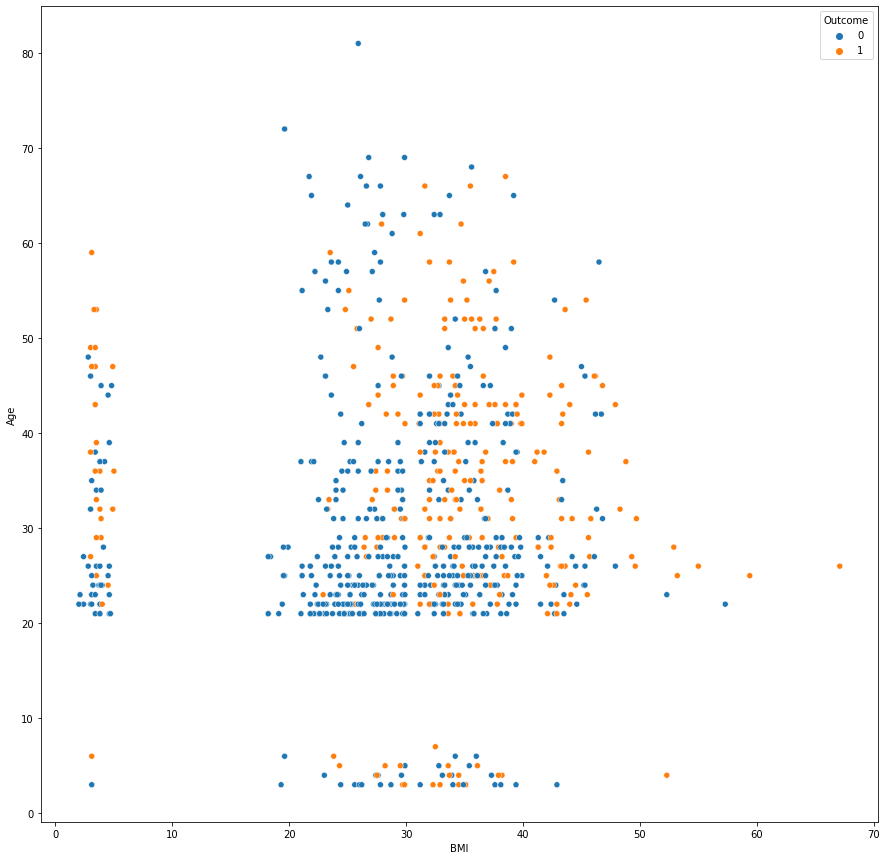

In [7]:
# Can check how BMI and age affect diabetes with this scatter plot
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'BMI',y = 'Age', data  = diabetes_df, hue = 'Outcome')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


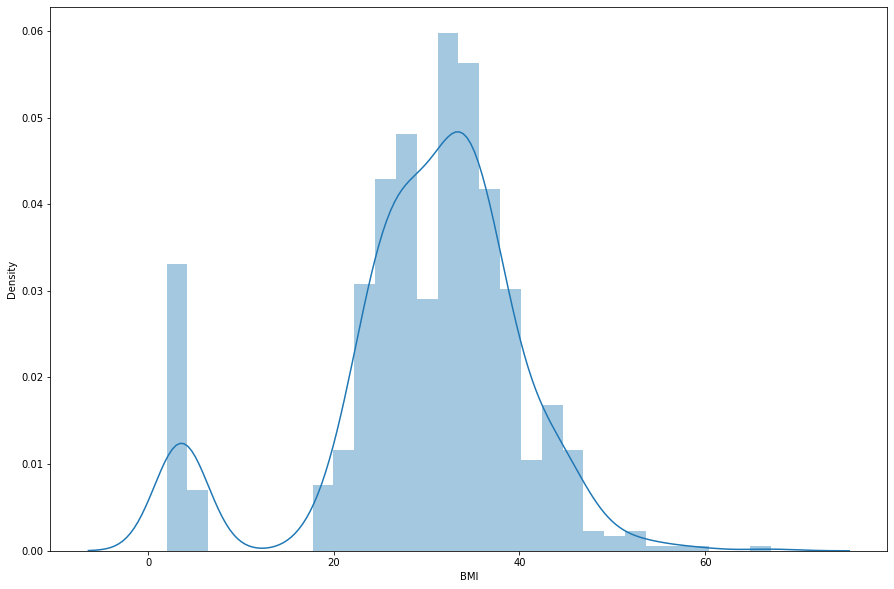

In [9]:
# This seems to suggest that the older and larger your BMI, the higher the risk of diabetes
# This also shows a large set of outliers in BMI
# BMI < 10 is VERY unhealthy and almost impossible
# Seems more likely that this is an issue with the data collection than real reports
# We may want to remove those elements
plt.figure(figsize = (15,10))
sns.distplot(diabetes_df['BMI'])
plt.show()

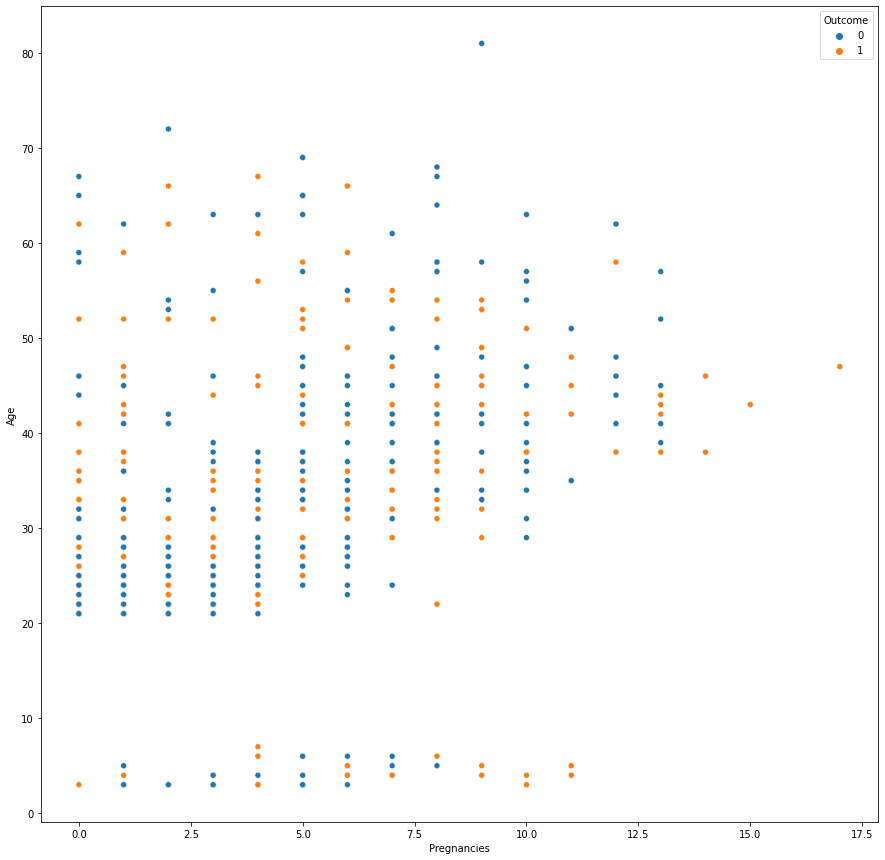

In [10]:
# Can check how Pregnancies and age affect diabetes with this scatter plot
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'Pregnancies',y = 'Age', data  = diabetes_df, hue = 'Outcome')
plt.show()

In [11]:
# This shows even more issues with the data
# like someone under the age of 3 having 5 pregnancies...
# Probably the smart thing to do would be to remove the ages under 20, and the BMI under 10

In [12]:
reduced_df = diabetes_df[diabetes_df['BMI'] >= 10]
reduced_df = reduced_df[reduced_df['Age'] >= 20]
reduced_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.000000,105.659898,26.6,0.351,31,0
2,8,183.0,64.0,25.876155,105.659898,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,4.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,5.0,32.000000,88.000000,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
760,2,88.0,58.0,26.000000,16.000000,28.4,0.766,22,0
761,9,17.0,74.0,31.000000,105.659898,44.0,0.430,43,1
762,9,89.0,62.0,25.876155,105.659898,22.5,0.142,33,0
763,10,11.0,76.0,48.000000,18.000000,32.9,0.171,63,0


In [30]:
# We can check other things like skin thickness
plt.figure(figsize = (20,20))
sns.boxplot(x = 'SkinThickness',
            y = 'Outcome',
            data = reduced_df,
            orient = 'h')
plt.show()
# We see that skin thickness may play a significant role in determining whether someone has diabetes

SyntaxError: ignored

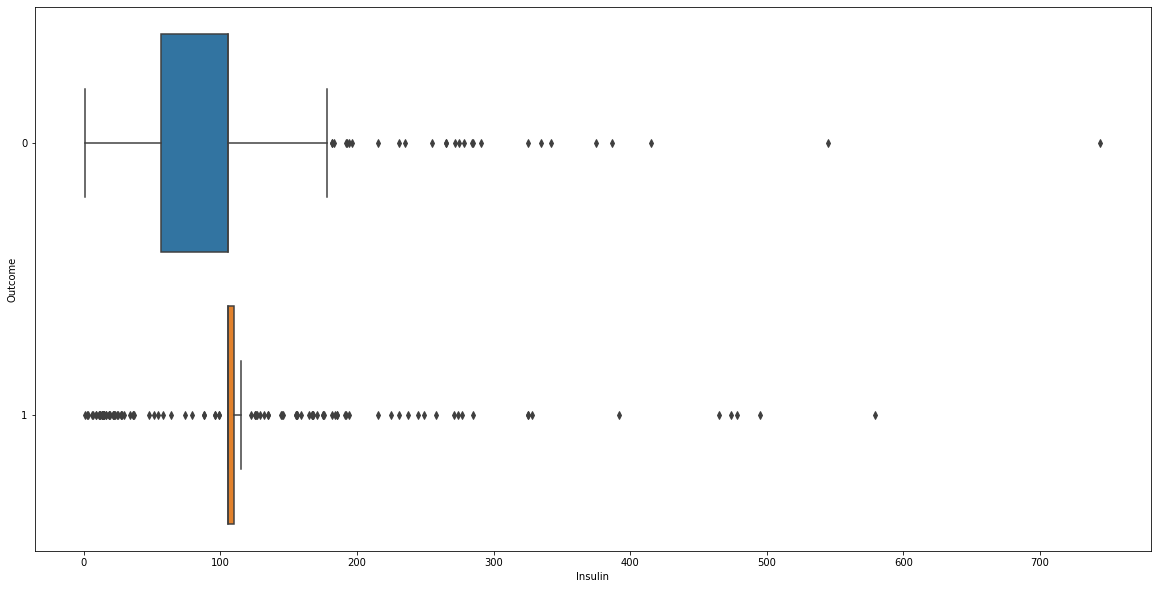

In [33]:
# We can check other things like insulin
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Insulin',
            y = 'Outcome',
            data = reduced_df,
            orient = 'h')
plt.show()

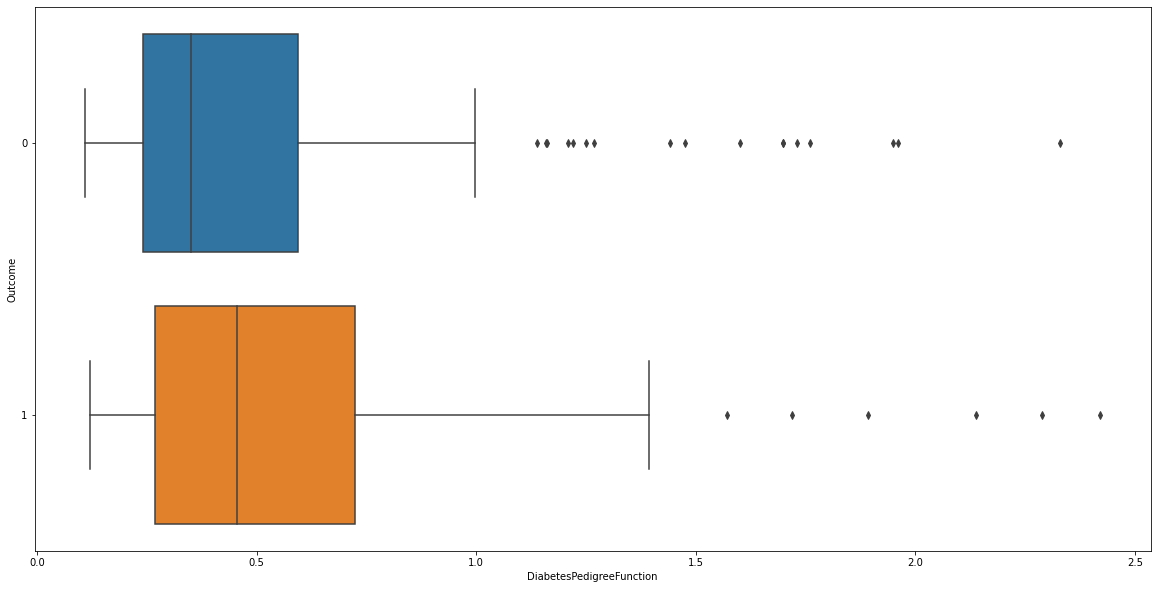

In [35]:
# Finally we can check the Diabetes Pedigree function
plt.figure(figsize = (20,10))
sns.boxplot(x = 'DiabetesPedigreeFunction',
            y = 'Outcome',
            data = reduced_df,
            orient = 'h')
plt.show()
# This also seems to suggest that it may have something of an effect

**Feature Engineering**

In [36]:
# The only categorical type we have is Pregnancies
pregnancies = pd.get_dummies(reduced_df['Pregnancies'])

In [61]:
categorised_df = pd.concat([reduced_df,pregnancies], axis = 1)
categorised_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,1,85.0,66.0,29.000000,105.659898,26.6,0.351,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,183.0,64.0,25.876155,105.659898,23.3,0.672,32,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,137.0,4.0,35.000000,168.000000,43.1,2.288,33,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,78.0,5.0,32.000000,88.000000,31.0,0.248,26,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2,88.0,58.0,26.000000,16.000000,28.4,0.766,22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
761,9,17.0,74.0,31.000000,105.659898,44.0,0.430,43,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
762,9,89.0,62.0,25.876155,105.659898,22.5,0.142,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
763,10,11.0,76.0,48.000000,18.000000,32.9,0.171,63,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Split into Test and Train**

In [42]:
X = categorised_df.drop(['Pregnancies', 'Outcome'],axis = 1)
Y = categorised_df['Outcome']

# We need to scale the features to help with convergence of the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.42424242, 0.53719008, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.91919192, 0.52066116, 0.25383832, ..., 0.        , 0.        ,
        0.        ],
       [0.44444444, 0.53719008, 0.2244898 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.44444444, 0.50413223, 0.25383832, ..., 0.        , 0.        ,
        0.        ],
       [0.05050505, 0.61983471, 0.47959184, ..., 0.        , 0.        ,
        0.        ],
       [0.61111111, 0.04958678, 0.26530612, ..., 0.        , 0.        ,
        0.        ]])

In [43]:
# split into train and test
from sklearn.model_selection import train_test_split
# The train data will be 80%
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)

**Building the ANN**

In [44]:
# We can build a dense layer in the NN
# We need further imports
from keras.layers import Dense
from keras.models import Sequential # RNNs + RBMs are not sequential
from keras.optimizers import Adam

In [71]:
# define a function to build NN
def build_model(input_size, *args,rate=0.1):
  model = Sequential()
  layers = iter(args)

  # Input layer
  model.add(Dense(units = next(layers),
                  activation = 'relu',
                  input_shape = [input_size]))
  
  # Hidden layers
  for layer in layers:
    model.add(Dense(units = layer,
                    activation = 'relu'))
    
  # Output layer
  model.add(Dense(units = 1,
                  activation = 'sigmoid'))   # default activation is linear

  # Define optimizer
  new_optimizer = Adam(learning_rate = rate)

  # Compile NN
  model.compile(loss = 'binary_crossentropy',
                optimizer = new_optimizer,
                metrics = ['accuracy'])
  
  return model

In [89]:
model_1 = build_model(len(X_train[0]), 128,64) # seemed to get the best results with this architecture
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 65        
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [90]:
history_1 = model_1.fit(X_train, Y_train, batch_size = 32, epochs = 200, validation_data = (X_test, Y_test))
model_1.evaluate(X_test, Y_test)

Epoch 1/200
17/17 [==============================] - 0s 6ms/step - loss: 0.8389 - accuracy: 0.5977 - val_loss: 0.6858 - val_accuracy: 0.6183
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.6916 - val_loss: 0.6089 - val_accuracy: 0.6565
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7126 - val_loss: 0.6454 - val_accuracy: 0.6260
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.6897 - val_loss: 0.6665 - val_accuracy: 0.6641
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7510 - val_loss: 0.6218 - val_accuracy: 0.6031
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7529 - val_loss: 0.6180 - val_accuracy: 0.6412
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7567 - val_loss: 0.6212 - val_accuracy: 0.7023
Epoch 8/200
1

[0.8649437427520752, 0.7251908183097839]

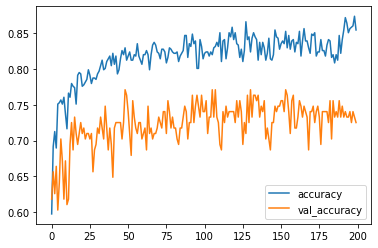

In [91]:
pd.DataFrame(history_1.history)[['accuracy','val_accuracy']].plot()

In [ ]:
# We can get an accuracy here of around 75%

We could try to build a more accurate model by changing how we impute the missing data. For example we could use the mean from the k nearest neighboors

**Using the full data set**

Let us use the full data set (with the outliers and bad data included). We should not expect to see a better outcome

In [92]:
pregnancies = pd.get_dummies(diabetes_df['Pregnancies'])

categorised_df = pd.concat([diabetes_df, pregnancies], axis = 1)

x = categorised_df.drop(['Pregnancies', 'Outcome'], axis = 1)
y = categorised_df['Outcome']

In [142]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x_scaled = scaler.transform(x)

# The train data will be 80%
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 100)

In [143]:
model_2 = build_model(len(x_train[0]), 128, 64)
model_2.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 128)               3200      
_________________________________________________________________
dense_83 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 65        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [144]:
history_2 = model_2.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_test, y_test))
model_2.evaluate(x_test, y_test)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9510 - accuracy: 0.6287 - val_loss: 0.6425 - val_accuracy: 0.6688
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6840 - val_loss: 0.6157 - val_accuracy: 0.6623
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.6954 - val_loss: 0.6431 - val_accuracy: 0.6364
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6808 - val_loss: 0.6150 - val_accuracy: 0.6494
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7264 - val_loss: 0.5945 - val_accuracy: 0.6688
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.7231 - val_loss: 0.6270 - val_accuracy: 0.6299
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7280 - val_loss: 0.6029 - val_accuracy: 0.7013
Epoch 8/100
2

[0.7604440450668335, 0.7207792401313782]

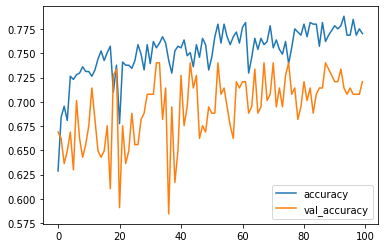

In [145]:
pd.DataFrame(history_2.history)[['accuracy','val_accuracy']].plot()

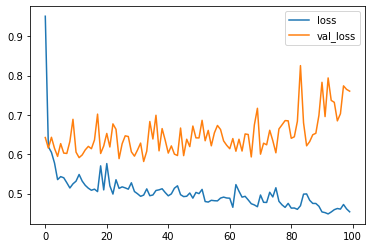

In [146]:
pd.DataFrame(history_2.history)[['loss','val_loss']].plot()

We see here that the accuracy is around 65-70% so less good than with the reduced_df model

In [147]:
# Through experimentation we noticed that the accuracy of the model can depend on the random initialisation of the split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

model_3 = build_model(len(x_train[0]), 128, 64)
model_3.summary()

history_3 = model_3.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test, y_test))
model_3.evaluate(x_test, y_test)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 128)               3200      
_________________________________________________________________
dense_86 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 65        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 0s 5ms/step - loss: 1.1008 - accuracy: 0.5782 - val_loss: 0.6373 - val_accuracy: 0.6948
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6417 - val_loss: 0.5859 - val_accuracy: 0.7922
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6580 -

[0.45607295632362366, 0.7792207598686218]

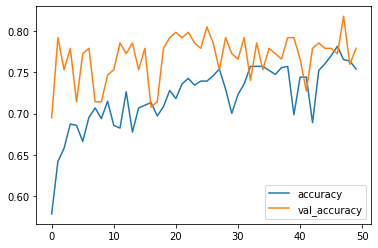

In [148]:
pd.DataFrame(history_3.history)[['accuracy','val_accuracy']].plot()

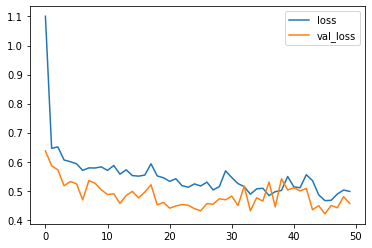

In [149]:
pd.DataFrame(history_3.history)[['loss','val_loss']].plot()

Here we see that we have an accuracy of around 78% but the validation accuracy and loss is less than that of the training data. This is very strange and would seem to suggest there is a problem with the test/train split or internal biases. It seems better to work with the reduced_df

The best model is therefore model_1